# Text classification for sentiment Analysis - Using Transfer Learning method on IMDB Dataset from Huggingface

In [ ]:
# Installing transformers and datasets object
%%capture
!pip install transformers[sentencepiece] datasets

## Gathering the lists of Datasets from HuggingFace

In [ ]:
from datasets import list_datasets
list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookcorpusopen'

In [ ]:
# Loading the imdb dataset
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [ ]:
# Sampling the first record of the train dataset
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [ ]:
# Sampling the first record of the test record
imdb['test'][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## To reduce the time used for training the model, we will reduce the amount of the "train" subset to 2000 records.

In [ ]:
# Making sure that the dataset labels are equally distributted in the train dataset
import datasets

train_records = 2000
label_class_no = train_records//2

# filtering the label class in the dataset
train_pos = imdb['train'].filter(lambda sample: sample['label'] == 1)
train_neg = imdb['train'].filter(lambda sample: sample['label'] == 0)

# Extracting the label classes according to their required amount
train_pos = train_pos.shuffle(seed=1).select(range(label_class_no))
train_neg = train_neg.shuffle(seed=1).select(range(label_class_no))

# concatenate the two classes after shuffling the records
train_dataset = datasets.concatenate_datasets([train_pos, train_neg]).shuffle(seed=1)

# Select the final 2000 records randomly from the concatenated subset
train_dataset = train_dataset.select(range(train_records))

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
# Printing the train dataset subsets
print(train_pos['label'][:20])
print(train_neg['label'][:20])
print(train_dataset['label'][:20])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0]


In [ ]:
# Updating the 'train' imdb dataset
imdb['train'] = train_dataset
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [ ]:
# Confirming the updated 'imdb' database structure
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

## Splitting the "train" dataset of 2000 records into train (80%) and validation (20%) subsets

In [ ]:
from datasets import DatasetDict
from sklearn.model_selection import train_test_split

# Splitting the remaining 2000 records of the train subset into train and validation subsets
train_texts = imdb['train']['text']
train_labels = imdb['train']['label']

train_texts, valid_texts, train_labels, valid_labels = train_test_split(
    train_texts, train_labels, stratify=train_labels, test_size=0.2, random_state=1)

# Creating train and validation datasets
train_dataset = {'text': train_texts, 'label': train_labels}
valid_dataset = {'text': valid_texts, 'label': valid_labels}


In [ ]:
# Converting the created dictionaries into dataset objects
from datasets import Dataset

# Convert dictionary classes into Dataset objects
train_dataset = Dataset.from_dict(train_dataset)
valid_dataset = Dataset.from_dict(valid_dataset)

# Set the train and validation datasets to"train" and "validation" keys in the imdb DatasetDict
imdb["train"] = train_dataset
imdb["validation"] = valid_dataset

# Reset the format of the imdb DatasetDict
imdb.reset_format()
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [ ]:
# Extracting some amount of records from the test dataset to create a new test set
test_records = 400
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(test_records))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [ ]:
# Looking into the unsupervised subset
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

### Becuase the unsupervised subset does not carry useful information and the label is '-1' instead of '1' or '0', it will be removed.

In [ ]:
# Deleting the unsupervised subset
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

# Data Exploration

In [ ]:
# Importing libraries for performing  data exploration
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [ ]:
# Having a look at a sample of the train dataset
imdb.set_format('pandas')
df_train = imdb['train'][:]
df_train.sample(frac=1 ,random_state=1).head(5)

,text,label
75,"This film is really bad. It maybe harsh, but it is. It really is. Poor script, every vampire cliché in the book is used, and no sympathy is given at all to the origins of the main character ... i.e. ole Dracula. There have been some truly brillia...",0
1284,"The Japanese ""Run Lola Run,"" his is one offbeat movie which will put a smile on just about anyone's face. Fans of Run Lola Run, Tampopo, Go!, and Slacker will probably like this one. It does tend to follow a formula that is increasingly popular t...",1
408,"Who could possibly sympathize with these two obnoxious protagonists? What's intended to be a light, frothy comedy about neighbor children who can't give up their childhood game of dare even as they age well into adulhood, comes off more as an exe...",0
1282,"I only saw IPHIGENIA once, almost 30 years ago, but it has haunted me since.<br /><br />One sequence particularly stays in mind, and could only have been fashioned by a great director, as Michael Cacoyanis undoubtedly is.<br /><br />The context: ...",1
1447,"This film is quite boring. There are snippets of naked flesh tossed around in a lame attempt to keep the viewer awake but they don't succeed.<br /><br />The best thing about the movie is Lena Olin--she does a masterful job handling her character,...",0


## Dataset Cleaning

In [ ]:
# Sampling the first text in the training subset
df_train.loc[0, 'text']

"A mix of Ninja stuff mixed with a sub-James Bond storyline. The result is incredibly awful and boring, being just the stage for endless gun battles. I can't believe this was released in theaters. Terminate this movie."

In [ ]:
# Removing the html syntax from the text
df_train['text'] = df_train.text.str.replace('<br />', '')
df_train.loc[0, 'text']

"A mix of Ninja stuff mixed with a sub-James Bond storyline. The result is incredibly awful and boring, being just the stage for endless gun battles. I can't believe this was released in theaters. Terminate this movie."

In [ ]:
# Checking the first five records after cleaning the training data
df_train.sample(frac=1 ,random_state=1).head(5)

,text,label
75,"This film is really bad. It maybe harsh, but it is. It really is. Poor script, every vampire cliché in the book is used, and no sympathy is given at all to the origins of the main character ... i.e. ole Dracula. There have been some truly brillia...",0
1284,"The Japanese ""Run Lola Run,"" his is one offbeat movie which will put a smile on just about anyone's face. Fans of Run Lola Run, Tampopo, Go!, and Slacker will probably like this one. It does tend to follow a formula that is increasingly popular t...",1
408,"Who could possibly sympathize with these two obnoxious protagonists? What's intended to be a light, frothy comedy about neighbor children who can't give up their childhood game of dare even as they age well into adulhood, comes off more as an exe...",0
1282,"I only saw IPHIGENIA once, almost 30 years ago, but it has haunted me since.One sequence particularly stays in mind, and could only have been fashioned by a great director, as Michael Cacoyanis undoubtedly is.The context: the weight of history an...",1
1447,"This film is quite boring. There are snippets of naked flesh tossed around in a lame attempt to keep the viewer awake but they don't succeed.The best thing about the movie is Lena Olin--she does a masterful job handling her character, but Day-Lew...",0


In [ ]:
# Repeating the process for the validation dataset
df_valid = imdb['validation'][:]
df_valid['text'] = df_valid.text.str.replace('<br />', '')

# Checking the first five records after cleaning the validation data
df_valid.sample(frac=1 ,random_state=1).head(5)

,text,label
398,"This, ""Prodigal Son"" and ""Eastern Condors"" are my favourite Sammo Hung films. The Fat Dragon is fatter in this outing than he was in ""Condors"", but he's no less sure-footed as director or actor. He is, in fact, at the top of his form and delivers...",1
125,"In Budapest, Margaret Sullavan (as Klara Novak) gets a job as clerk in a gift shop; there, she bickers with co-worker James Stewart (as Alfred Kralik). The two don't get along on the job because each has fallen in love with a unseen pen pal. Watc...",1
328,"A very cute movie with a great background provided by the city of Boston and Fenway Park. As a baseball fan and light movie addict, it hit a homerun for me. Plenty of laughs and plenty of authentic baseball scenes with real ballplayers and real r...",1
339,"Somewhere in his non-fiction book DANSE MACABRE, Stephen King suggests that one secret of writing scary stories is to avoid showing your readers exactly what horrible thing is waiting behind the door to get them. If at last the door bursts open a...",0
172,"This is the most messed up entry on IMDb that I've yet to stumble across. All the previous reviewers act like this is the movie. This is NOT the movie. Rather it's merely a featurette that's an extra on the DVD of the movie ""The One"" It also nowh...",0


In [ ]:
# Repeating the process for the test dataset
df_test = imdb['test'][:]
df_test['text'] = df_test.text.str.replace('<br />', '')

# Checking the first five records after cleaning the validation data
df_test.sample(frac=1 ,random_state=1).head(5)

,text,label
398,"I simply cannot believe the folks that made and performed in this movie really took it seriously. The skits on SNL look more real. Everything was laughably fake. The goofy gunfights, the ridiculous fist fights, the dialogue, the sappy background ...",0
125,"An absorbing exploration of virtual reality, although it is not yet clear how much the director himself intended. This film deliberately takes you through several layers of artificial reality, leaving only subtle clues about which layer of virtua...",1
328,"This is a great movie to look at, since it so nicely directed by Andrzej Wajda but at the same time I wished the movie would had some more depth in it, in terms of its story. It's an historically relevant movie about the last days of the French r...",1
339,"if you're a fan of the original ten commandments, this movie will make you weep inside. granted, i'm only about 1/2 hour into it currently, but it's so painful, i felt it was my duty to warn away real ten commandments fans before they are subject...",0
172,"I think Josh Duhamel is so great!! The rest of the show is fun to watch, but, I think it is the handsome and sexy Josh Duhamel that makes the show ""Las Vegas"" really fun to see!! In the days of ""Magnum"" I loved Tom Selleck, I thought he was the s...",1


In [ ]:
# Checking the distribution of the labels in the train dataset
df_train.label.value_counts()

0    800
1    800
Name: label, dtype: int64

In [ ]:
# Checking the distribution of the labels in the validation dataset
df_valid.label.value_counts()

0    200
1    200
Name: label, dtype: int64

In [ ]:
# Checking the distribution of the labels in the test dataset
df_test.label.value_counts()

0    214
1    186
Name: label, dtype: int64

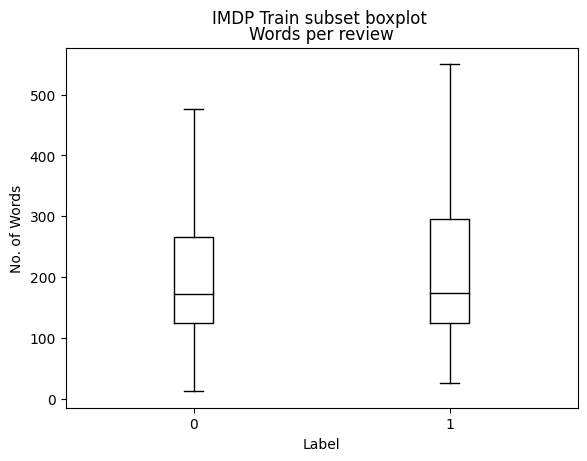

In [ ]:
# Boxplot showing the distribution of the labels in the train subset
df_train["Words per review"] = df_train["text"].str.split().apply(len)
df_train.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("IMDP Train subset boxplot ")
plt.ylabel("No. of Words")
plt.xlabel("Label")
plt.show()

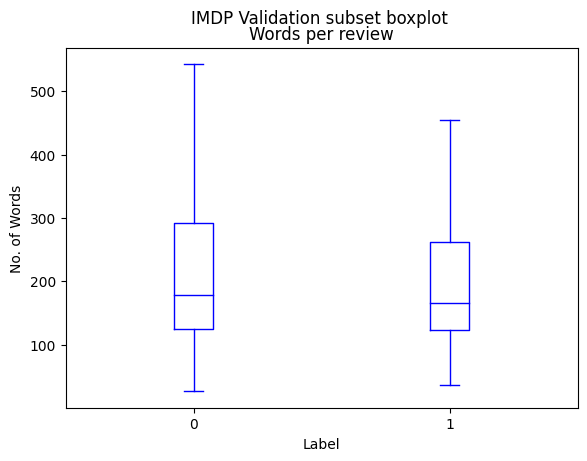

In [ ]:
# Boxplot showing the distribution of the labels in the validation subset
df_valid["Words per review"] = df_valid["text"].str.split().apply(len)
df_valid.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="blue")
plt.suptitle("IMDP Validation subset boxplot ")
plt.ylabel("No. of Words")
plt.xlabel("Label")
plt.show()

## The boxplot for the training subsets are very similar and they are well distributed. Therefore, they are very suitable for machine learning. The validation subset is mainly for the purpose of validating the effectiveness of the trained model.

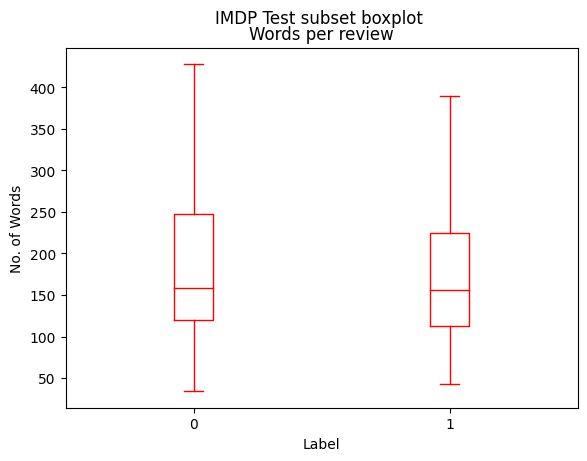

In [ ]:
# Boxplot showing the distribution of the labels in the test subset
df_test["Words per review"] = df_test["text"].str.split().apply(len)
df_test.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="Red")
plt.suptitle("IMDP Test subset boxplot ")
plt.ylabel("No. of Words")
plt.xlabel("Label")
plt.show()

## The boxplot for the test subset is slightly skewed. It is not a problem becuase it is just a test dataset that is used for testing the effectiveness of the model

In [ ]:
# Looking through the new train dataset
# 0 is negative
# 1 is positive
df_train.head(5)

,text,label,Words per review
0,"A mix of Ninja stuff mixed with a sub-James Bond storyline. The result is incredibly awful and boring, being just the stage for endless gun battles. I can't believe this was released in theaters. Terminate this movie.",0,37
1,"First of all there wasn't really anything in this movie that grabbed me really. It wasn't a bad movie, just another movie where I said ""Well, that wasn't anything special"" after I'd seen it. There was probably drama and stuff, but it simply didn'...",0,197
2,"An older man touches a flower in his wife's greenhouse that seems to be wilting. He gets pricked by it, or bitten by something on it. He quickly becomes ill, and at the hospital spits out a large writhing white larva of some kind. A later attempt...",0,253
3,I am amazed that movies like this can still be made. I watch all kinds of movies all the time with my friends and i can say that this is one of the best i ever seen. Never thinked that a movie of 146 minutes can make me think about it on and on.W...,1,138
4,"If I were to create a movie thermometer, this movie would be absolute zero. Out of ten stars, I would rate it as follows:Plot: zero stars Video quality: zero stars Sound Quality: zero stars Acting: zero starsIt is as though high school students g...",0,182


In [ ]:
# Confirmining with the statistcal summary of the train subset, shows that the distribution is okay
df_train.describe()

,label,Words per review
count,1600.000000,1600.000000
mean,0.500000,233.155625
std,0.500156,174.419800
min,0.000000,12.000000
25%,0.000000,125.000000
50%,0.500000,173.000000
75%,1.000000,281.250000
max,1.000000,984.000000


In [ ]:
# Confirmining with the statistcal summary of the validation subset, shows that the distribution is ok,
# but the mean is slightly higher than train subset which means it had more words per review
df_valid.describe()

,label,Words per review
count,400.000000,400.000000
mean,0.500000,227.180000
std,0.500626,163.727715
min,0.000000,26.000000
25%,0.000000,123.000000
50%,0.500000,173.500000
75%,1.000000,277.250000
max,1.000000,994.000000


# Machine Learning

In [ ]:
# Reseting the imdb dataset to its initial format
imdb.reset_format()

## Tokenizer. Using "bert-base-cased" checkpoint

In [ ]:
from transformers import AutoTokenizer

#checkpoint = "distilbert-base-cased"
checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [ ]:
# Printing the encoded train set for first record
print(imdb_encoded['train'][0])

{'text': "A mix of Ninja stuff mixed with a sub-James Bond storyline. The result is incredibly awful and boring, being just the stage for endless gun battles. I can't believe this was released in theaters. Terminate this movie.", 'label': 0, 'input_ids': [101, 138, 5495, 1104, 19488, 4333, 3216, 1114, 170, 4841, 118, 1600, 8211, 9844, 119, 1109, 1871, 1110, 12170, 9684, 1105, 12533, 117, 1217, 1198, 1103, 2016, 1111, 12401, 2560, 7619, 119, 146, 1169, 112, 189, 2059, 1142, 1108, 1308, 1107, 13090, 119, 12008, 9019, 14248, 1142, 2523, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Analysing the Maching learning on a small IMDB dataset

In [ ]:
# Importing the required library and displaying available transformers
import transformers
from transformers import Trainer, TrainingArguments
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotImageClassification',
 'AutoModelForZeroShotObjectDetection

In [ ]:
# Imports the PyTorch library
import torch
# Imports the transformers library, which allows us to load a pre-trained model for sequence classification
from transformers import AutoModelForSequenceClassification

# Determines if a CUDA-enabled GPU is available and sets the device variable to "cuda" if so, or "cpu" otherwise
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# Extracting smaller datasets
from datasets import DatasetDict

small_imdb = DatasetDict()
small_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
small_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
small_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

# Saving the dataset to the local system instead of the memory
small_imdb_encoded = small_imdb.map(tokenize_function, batched=True, batch_size=None)
small_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [ ]:
# Setting the arguments for training the small subsets
batch_size = 8
logging_steps = len(small_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
ign

In [ ]:

#  Clears the memory cache of the CUDA-enabled GPU
torch.cuda.empty_cache()

# Initializing a Trainer object from the transformers library
trainer = Trainer(model=model,
                  args=args,
                  train_dataset=small_imdb_encoded["train"],
                  eval_dataset=small_imdb_encoded["validation"],
                  tokenizer=tokenizer)

# Training the language model using the training and validation datasets
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.682600,0.711710
2,0.672200,0.774006


In [ ]:
# Predicting text with the test subset
preds = trainer.predict(small_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.380796  , -0.17086728],
       [-0.19408922, -0.3723289 ],
       [-0.34023526, -0.2576324 ],
       [-0.31041008, -0.33655944],
       [-0.35984287, -0.21427172],
       [-0.08238272, -0.46064642],
       [-0.23590107, -0.39409265],
       [-0.29208592, -0.20198455],
       [-0.17398088, -0.4323232 ],
       [-0.18471867, -0.39955   ]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.6839499473571777, 'test_runtime': 0.2983, 'test_samples_per_second': 33.528, 'test_steps_per_second': 6.706})

In [ ]:
# Confirmining the shape of the predicted values object
preds.predictions.shape

(10, 2)

In [ ]:
# Getting the predicted values by selecting the maximum values
preds.predictions.argmax(axis=-1)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# Displaying there original labels
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# Displaying Confusion matrix
from sklearn.metrics import confusion_matrix
y_test = preds.label_ids
output = preds.predictions.argmax(axis=-1)
cm=confusion_matrix(y_test,output)
cm

array([[4, 3],
       [2, 1]])

In [ ]:
# Calculating acuracy score for the predicted values
from sklearn.metrics import accuracy_score
accuracy_score(y_test, output)

0.5

In [ ]:
# Defining an accuracy function
def accuracy_func(preds):
   predictions = preds.predictions.argmax(axis=-1)
   labels = preds.label_ids
   accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
   return {'accuracy': accuracy}


In [ ]:
# Adding accuracy score to the arguments
torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=accuracy_func,
                  args=args,
                  train_dataset=small_imdb_encoded["train"],
                  eval_dataset=small_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.595100,0.813639,0.400000
2,0.546000,0.869236,0.200000


## After training the small dataset, its time to train the main dataset

In [ ]:
# Setting the arguments for training the main subsets
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
#  Clears the memory cache of the CUDA-enabled GPU
torch.cuda.empty_cache()

# Initializing a Trainer object to train the main dataset
trainer = Trainer(model=model,
                  args=args,
                  compute_metrics=accuracy_func,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)

# Training the language model using the training and validation datasets
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.494500,0.416126,0.835000
2,0.243000,0.309392,0.880000


## The model gave an accuracy score of approximatety 88% after the last epoch which is very okay for predicting


In [ ]:
# Evaluating the trainer object on the validation dataset to assess the model's performance
trainer.evaluate()

{'eval_loss': 0.3093923330307007,
 'eval_accuracy': 0.88,
 'eval_runtime': 13.6056,
 'eval_samples_per_second': 29.4,
 'eval_steps_per_second': 1.837,
 'epoch': 2.0}

In [ ]:
# Saving the model

trainer.save_model()

In [ ]:
tc_model = 'bert-base-cased-finetuned-imdb'
tc_model

'bert-base-cased-finetuned-imdb'

In [ ]:
model_name

'bert-base-cased-finetuned-imdb'

In [ ]:
# Using some sample tests
sample_text1 = 'This is not my idea of fun'
sample_text2 = 'This was beyond incredible'
sample_text3 = 'As a kid, I spent my summers with my grandparents on their ranch in Texas. I helped fix windmills, vaccinate cattle, and do other chores. We also watched soap operas every afternoon, especially “Days of our Lives.” My grandparents belonged to a Caravan Club, a group of Airstream trailer owners who travel together around the U.S. and Canada. And every few summers, we’d join the caravan. We’d hitch up the Airstream trailer to my grandfather’s car, and off we’d go, in a line with 300 other Airstream adventurers. I really had fun'

In [ ]:
# Classifying sample text1
from transformers import pipeline
#classifier = pipeline('text-classification', model=model_name)
classifier = pipeline('text-classification', model=tc_model)
classifier(sample_text1)

[{'label': 'LABEL_0', 'score': 0.889866054058075}]

In [ ]:
# Classifying sample text2
classifier(sample_text2)

[{'label': 'LABEL_0', 'score': 0.6142370700836182}]

# Using bert-based-cased over distilbert text classifier gave better score and therefore resulted in better classification.

# Classifying the test datasets

In [ ]:
# Predicting text with the test subset
preds = trainer.predict(imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-1.4240739 ,  1.1414902 ],
       [ 1.724711  , -1.4689207 ],
       [ 1.6933565 , -1.5717462 ],
       [ 1.5252726 , -1.5726306 ],
       [-0.4345044 ,  0.3147203 ],
       [ 1.1631987 , -1.2156776 ],
       [ 1.8046752 , -1.60018   ],
       [ 1.5102185 , -1.4326223 ],
       [-0.7925622 ,  0.9413714 ],
       [ 1.5176258 , -1.5129645 ],
       [ 1.3966624 , -1.5168691 ],
       [-1.5813162 ,  1.3806918 ],
       [ 1.6466953 , -1.5511296 ],
       [-1.5405385 ,  1.5453244 ],
       [ 1.733097  , -1.6054337 ],
       [ 1.4142128 , -1.4727074 ],
       [ 1.7916317 , -1.5069104 ],
       [ 1.1858978 , -1.291798  ],
       [ 1.6088566 , -1.4973283 ],
       [-1.5220286 ,  1.3693901 ],
       [-0.4119023 ,  0.11532792],
       [ 1.2328248 , -1.4438053 ],
       [ 1.8063076 , -1.5379587 ],
       [-0.9260237 ,  0.86474925],
       [ 1.7390407 , -1.5444751 ],
       [ 1.7096089 , -1.5815825 ],
       [ 1.7677368 , -1.5471554 ],
       [ 1.6286973 , -1.48

In [ ]:
# Confirmining the shape of the predicted values object
preds.predictions.shape

(400, 2)

In [ ]:
# Displaying Confusion matrix
from sklearn.metrics import confusion_matrix
y_test = preds.label_ids
output = preds.predictions.argmax(axis=-1)
cm=confusion_matrix(y_test,output)
cm

array([[183,  31],
       [ 17, 169]])

In [ ]:
# Calculating acuracy score for the predicted values
accuracy_score(y_test, output)

0.88

# Displaying WordCloud with the text

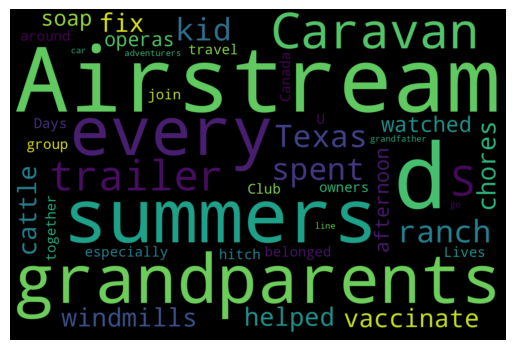

In [ ]:
# Displaying Word cloud from sample text3
#from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

#TXT_FILE = Path.cwd() / "jeff_bezos_speech.txt"

# Read text
#text = open(sample_text1, mode="r", encoding="utf-8").read()
text = sample_text3
stopwords = STOPWORDS

# Create visualisation
wordcloud = WordCloud(stopwords=stopwords, width = 1500, height = 1000, margin = 20).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()
# store to file
wordcloud.to_file("wordcloud_output.png")


#wc = WordCloud(background_color="white", stopwords=stopwords, height=600, width=400)
#wc.generate(text)



## Zipping the Model files together and downloading it from Google Colab to the local drive

In [ ]:
#@title Utility to zip and download a directory
#@markdown Use this method to zip and download a directory. For ex. a TB logs
#@markdown directory or a checkpoint(s) directory.

from google.colab import files
import os

dir_to_zip = '/content/bert-base-cased-finetuned-imdb' #@param {type: "string"}
output_filename = 'bertfile.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>